## Caso: Se tiene un fichero csv con información relativa a datos de un estudio realizado en la zona de Boston, donde se analizan diferentes variables, como son el índice de crimen, el número de habitaciones, el porcentaje de habitantes de clase baja y el valor medio de las casas de esa zona.

## Pasos: 
## Importar librerías a utilizar para el caso en cuestión (panda, matplotlib).
## Leer csv correspondiente. 
## Renombrar campos.

In [8]:
# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Paso 2: Leer el archivo CSV
url = "https://raw.githubusercontent.com/Nataliagod/TD-CD/main/casasboston.csv"
datos_boston = pd.read_csv(url)

# Paso 3: Renombrar campos
datos_boston = datos_boston.rename(columns={
    "TOWN": "CIUDAD",
    "LON": "LONGITUD",
    "LAT": "LATITUD",
    "MEDV": "VALOR_MEDIO_VIVIENDAS_OCUPADAS",
    "CRIM": "TASA_CRIMENES_PER_CAPITA",
    "ZN": "PROPORC_TERRENOS_RESIDENC",
    "INDUS": "PROPORC_ACRES_NEGOCIOS_NO_MINORISTAS",
    "CHAS": "VARIABLE_CHARLES_R",
    "NOX": "CONCENTR_OXIDOS_NITRICOS",
    "RM": "MEDIA_HABITACIONES_X_VIVIENDA",
    "AGE": "PROPORC_UNID_OCUPADAS_ANTIGUAS",
    "DIS": "DISTANCIA_CENTROS_EMPLEOS",
    "RAD": "INDICE_ACCESO_CARRETERAS",
    "TAX": "TASA_IMPUESTO_PROPIEDAD",
    "PTRATIO": "RATIO_ALUMNO_MAESTRO",
    "B": "PROPORCION_AFROAMERICANOS",
    "LSTAT": "PORCENTAJE_POB_ESTATUS_BAJO"
})

# Visualizamos las primeras filas para verificar
print(datos_boston.head())

       CIUDAD  LONGITUD  LATITUD  VALOR_MEDIO_VIVIENDAS_OCUPADAS  \
0      Nahant   -70.955  42.2550                            24.0   
1  Swampscott   -70.950  42.2875                            21.6   
2  Swampscott   -70.936  42.2830                            34.7   
3  Marblehead   -70.928  42.2930                            33.4   
4  Marblehead   -70.922  42.2980                            36.2   

   TASA_CRIMENES_PER_CAPITA  PROPORC_TERRENOS_RESIDENC  \
0                   0.00632                       18.0   
1                   0.02731                        0.0   
2                   0.02729                        0.0   
3                   0.03237                        0.0   
4                   0.06905                        0.0   

   PROPORC_ACRES_NEGOCIOS_NO_MINORISTAS  VARIABLE_CHARLES_R  \
0                                  2.31                   0   
1                                  7.07                   0   
2                                  7.07              

4. Confeccionar los siguientes Gráficos
● Para cada gráfico debe agregar la correcta interpretación para lectura de cualquier persona, esto es, no use términos técnicos.

### Histograma: Un histograma es útil para ver la distribución de una variable, es decir, nos permite ver los valores más comunes.

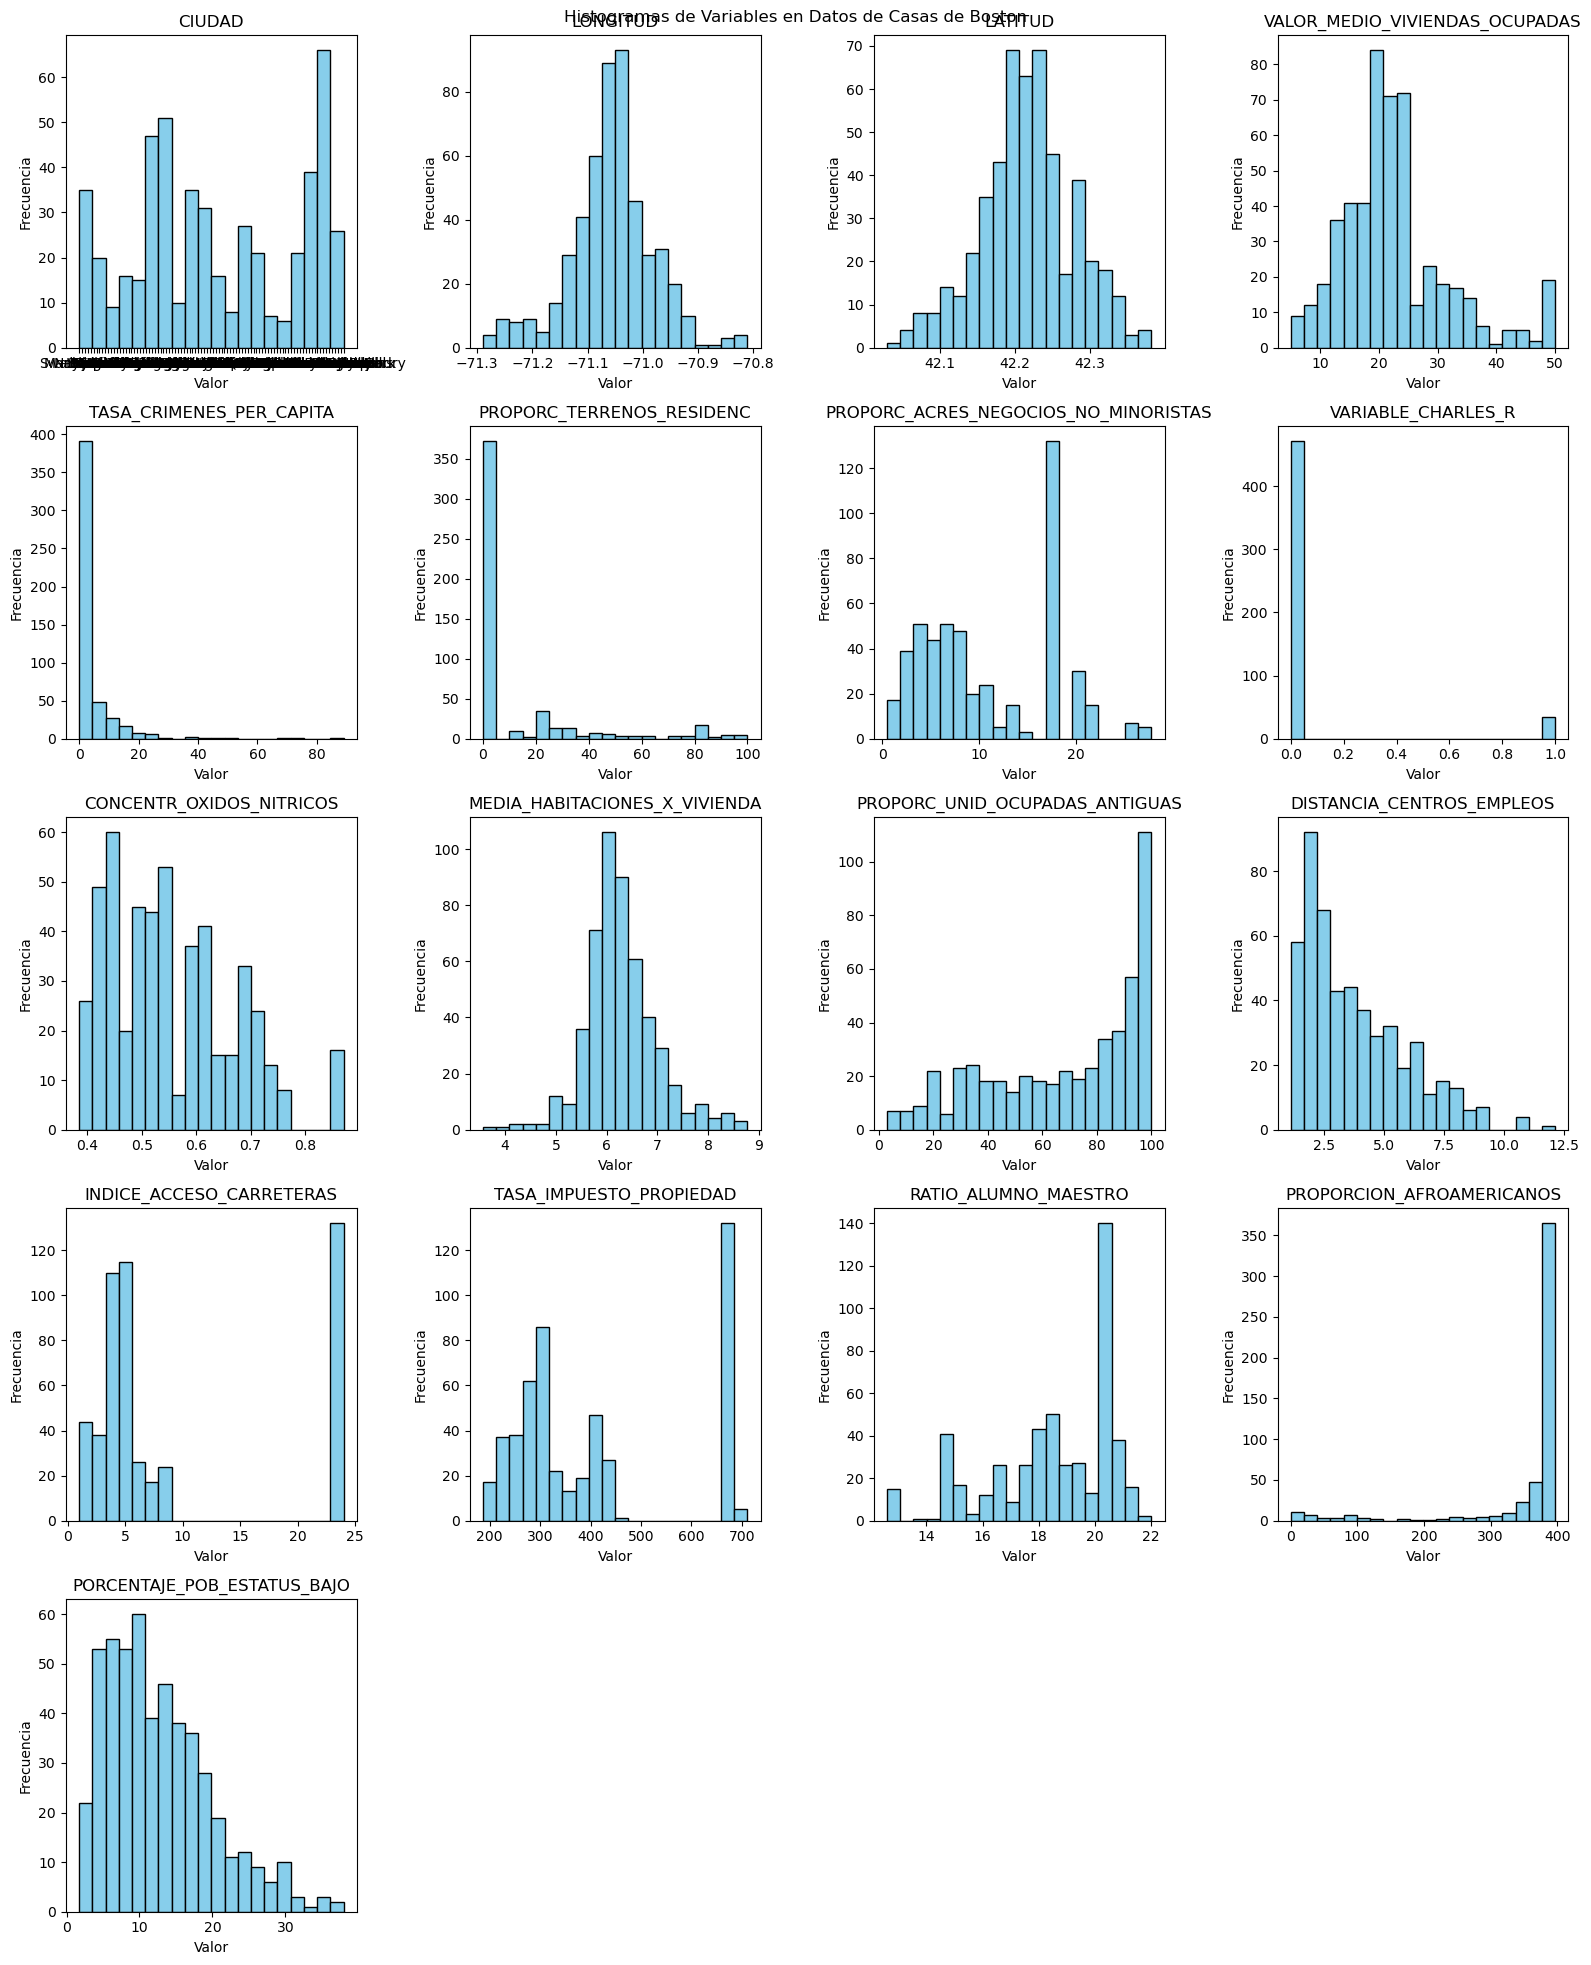

In [6]:
# Histogramas para cada variable
num_variables = len(datos_boston.columns)
num_filas = (num_variables + 3) // 4  # Redondeo hacia arriba
fig, axs = plt.subplots(num_filas, 4, figsize=(16, 4*num_filas))
fig.suptitle('Histogramas de Variables en Datos de Casas de Boston')

# Variables a graficar
variables = datos_boston.columns

# Recorremos las variables y creamos los histogramas
for i, variable in enumerate(variables):
    ax = axs[i // 4, i % 4]
    ax.hist(datos_boston[variable], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(variable)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Eliminar subgráficos no utilizados si hay menos de 16 variables
for i in range(num_variables, num_filas * 4):
    fig.delaxes(axs[i // 4, i % 4])

plt.tight_layout()
plt.show()

### Para el caso que se presenta se desea ver la distribución de la cantidad media de habitaciones en el estudio realizado.

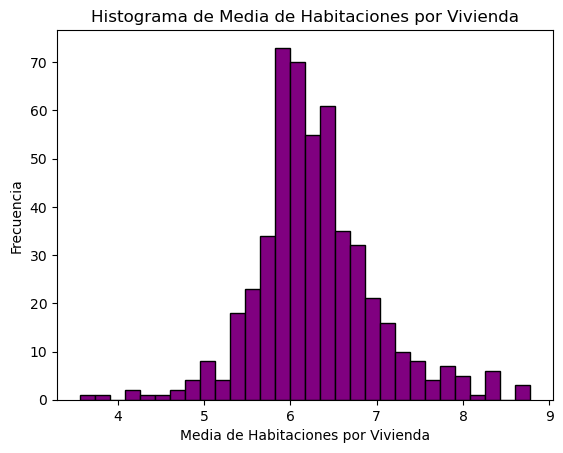

In [45]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Crear un histograma de 'MEDIA_HABITACIONES_X_VIVIENDA'
plt.hist(datos_boston['MEDIA_HABITACIONES_X_VIVIENDA'], bins=30, color='purple', edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Histograma de Media de Habitaciones por Vivienda')
plt.xlabel('Media de Habitaciones por Vivienda')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

#### Otro ejemplo

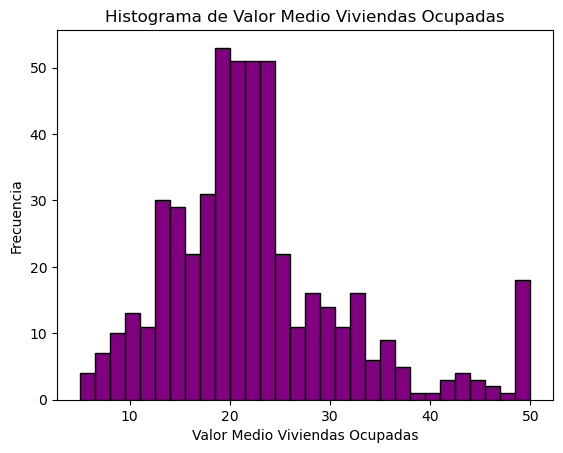

In [44]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Crear un histograma de 'VALOR_MEDIO_VIVIENDAS_OCUPADAS'
plt.hist(datos_boston['VALOR_MEDIO_VIVIENDAS_OCUPADAS'], bins=30, color='purple', edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Histograma de Valor Medio Viviendas Ocupadas')
plt.xlabel('Valor Medio Viviendas Ocupadas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Dispersión: sirve para representar la relación entre dos variables. 

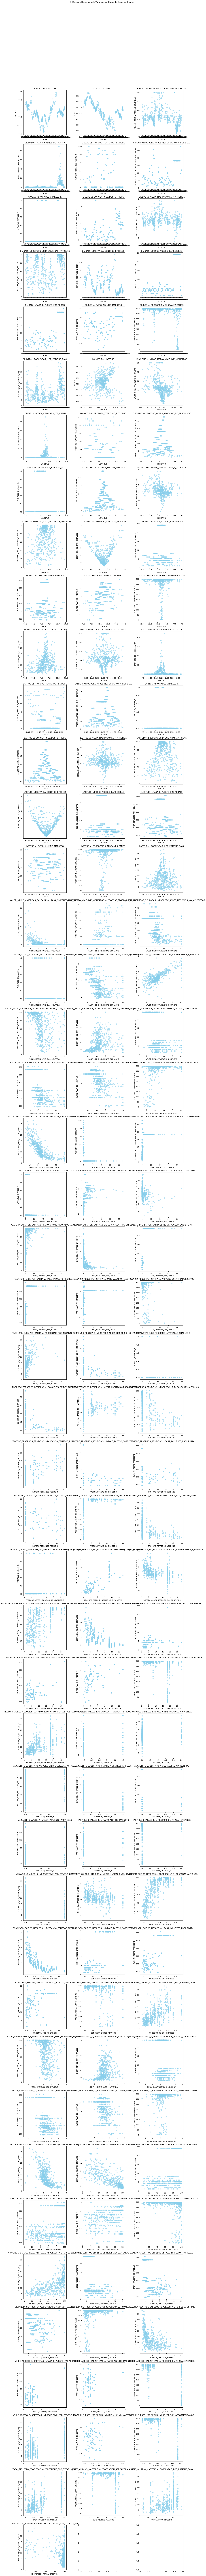

In [51]:
# Definir la lista de variables
variables = datos_boston.columns

# Obtener combinaciones únicas de variables
combinaciones_variables = list(itertools.combinations(variables, 2))

# Calcular el número de filas y columnas necesarias para organizar los gráficos
num_combinaciones = len(combinaciones_variables)
num_filas = (num_combinaciones + 2) // 3
num_columnas = min(num_combinaciones, 3)

# Crear la figura y los ejes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))
fig.suptitle('Gráficos de Dispersión de Variables en Datos de Casas de Boston')

# Iterar sobre las combinaciones únicas de variables y crear los gráficos de dispersión
for i, (variable_x, variable_y) in enumerate(combinaciones_variables):
    fila = i // num_columnas
    columna = i % num_columnas
    ax = axs[fila, columna]
    ax.scatter(datos_boston[variable_x], datos_boston[variable_y], color='skyblue', alpha=0.6)
    ax.set_xlabel(variable_x)
    ax.set_ylabel(variable_y)
    ax.set_title(f"{variable_x} vs {variable_y}")

# Eliminar subgráficos no utilizados si hay menos de 3 combinaciones
if num_combinaciones < 3:
    for i in range(num_combinaciones, 3):
        fig.delaxes(axs[num_filas-1, i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Para nuestro caso se desea ver la relación entre índice de crimen y el valor mediano de las casas. En otras palabras, ¿el índice de crimen afecta el valor medio de las casas?

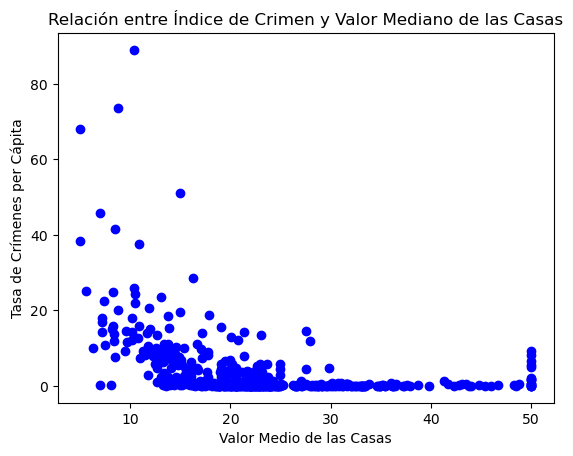

In [60]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión entre 'TASA_CRIMENES_PER_CAPITA' y 'VALOR_MEDIO_VIVIENDAS_OCUPADAS'
plt.scatter(datos_boston['VALOR_MEDIO_VIVIENDAS_OCUPADAS'], datos_boston['TASA_CRIMENES_PER_CAPITA'], color='blue')

# Agregar títulos y etiquetas
plt.title('Relación entre Índice de Crimen y Valor Mediano de las Casas')
plt.xlabel('Valor Medio de las Casas')
plt.ylabel('Tasa de Crímenes per Cápita')

# Mostrar el gráfico
plt.show()

#### Otra forma de hacer el mismo gráfico de dispersión con la misma pregunta planteada

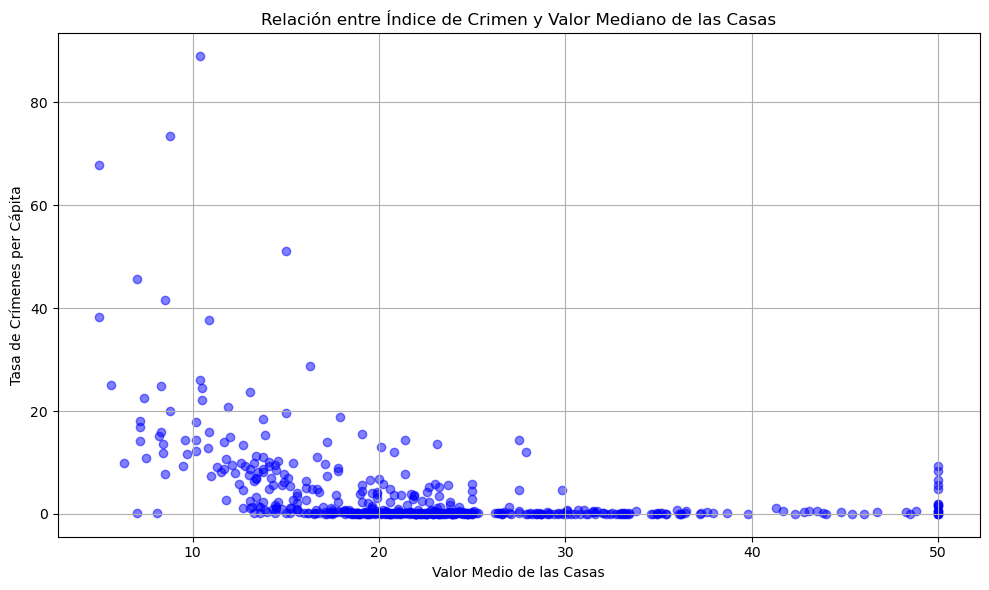

In [59]:

plt.figure(figsize=(10, 6))
plt.scatter(datos_boston['VALOR_MEDIO_VIVIENDAS_OCUPADAS'], datos_boston['TASA_CRIMENES_PER_CAPITA'], color='blue', alpha=0.5)
plt.title('Relación entre Índice de Crimen y Valor Mediano de las Casas')
plt.xlabel('Valor Medio de las Casas')
plt.ylabel('Tasa de Crímenes per Cápita')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Otro ejemplo de grafico

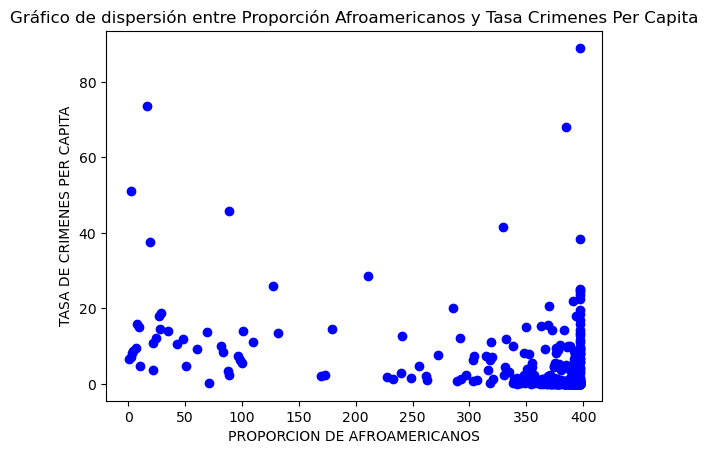

In [42]:
#Importar matplotlib
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión entre 'PROPORCION_AFROAMERICANOS' y 'TASA_CRIMENES_PER_CAPITA'
plt.scatter(datos_boston['PROPORCION_AFROAMERICANOS'], datos_boston['TASA_CRIMENES_PER_CAPITA'], color='blue')

# Agregar títulos y etiquetas
plt.title('Gráfico de dispersión entre Proporción Afroamericanos y Tasa Crimenes Per Capita')
plt.xlabel('PROPORCION DE AFROAMERICANOS')
plt.ylabel('TASA DE CRIMENES PER CAPITA')

# Mostrar el gráfico
plt.show()

### Cajas: Los diagramas de cajas son útiles para representar grupos de datos y compararlos entre ellos. Otro uso importante es que nos permiten identificar de forma sencilla si una variable tiene muchos outliers (valores atípicos) esto es, elementos que se alejan de los valores frecuentes de dicha variable.

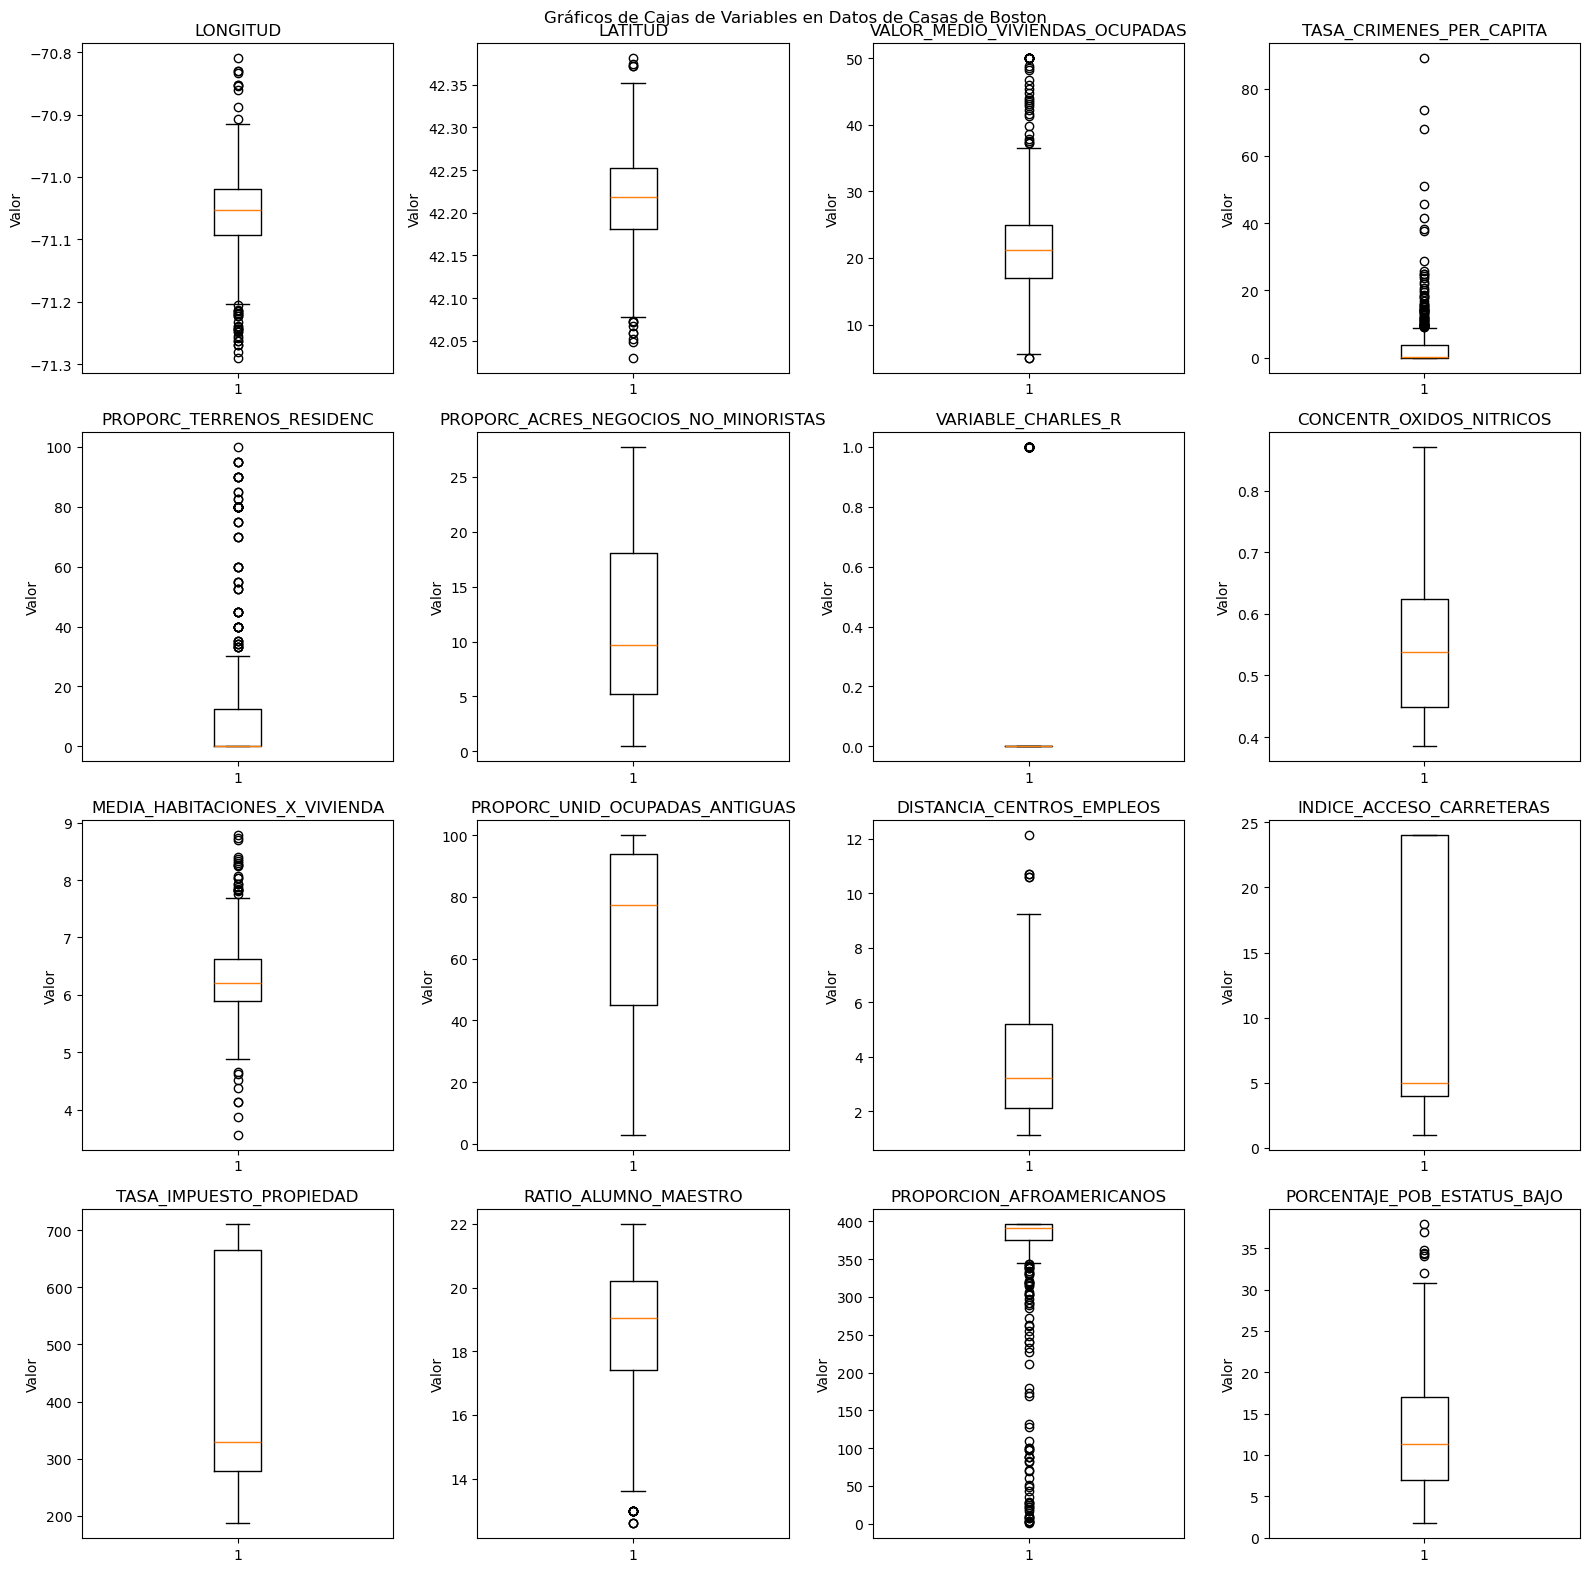

In [23]:
# Limpiar datos eliminando filas con valores faltantes o no numéricos
datos_boston_limpios = datos_boston.dropna().select_dtypes(include='number')

# Gráficos de Cajas para cada variable
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Gráficos de Cajas de Variables en Datos de Casas de Boston')

# Recorremos todas las variables y creamos los gráficos de cajas
for i, variable in enumerate(datos_boston_limpios.columns):
    ax = axs[i // 4, i % 4]
    ax.boxplot(datos_boston_limpios[variable])
    ax.set_title(variable)
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

### Para nuestro caso, se desea ver los valores atípicos de índice de crimen en los diferentes cuantiles de valor mediano.

In [63]:
import pandas as pd

# Calcular cuartiles para VALOR_MEDIO_VIVIENDAS_OCUPADAS
datos_boston['CUARTELES_VALOR_MEDIANO'] = pd.qcut(datos_boston['VALOR_MEDIO_VIVIENDAS_OCUPADAS'], q=4)

# Verificar la nueva columna
print(datos_boston['CUARTELES_VALOR_MEDIANO'].head())

0    (21.2, 25.0]
1    (21.2, 25.0]
2    (25.0, 50.0]
3    (25.0, 50.0]
4    (25.0, 50.0]
Name: CUARTELES_VALOR_MEDIANO, dtype: category
Categories (4, interval[float64, right]): [(4.999, 17.025] < (17.025, 21.2] < (21.2, 25.0] < (25.0, 50.0]]


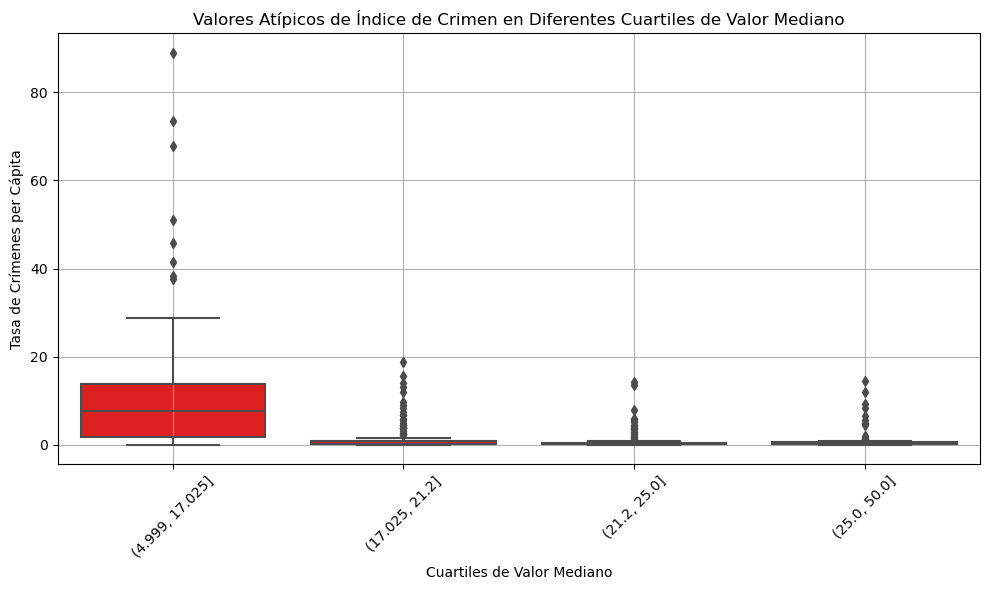

In [66]:
import seaborn as sns
import warnings

# Desactivar FutureWarning temporalmente
warnings.simplefilter(action='ignore', category=FutureWarning)

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='CUARTELES_VALOR_MEDIANO', y='TASA_CRIMENES_PER_CAPITA', data=datos_boston, color='red')
plt.title('Valores Atípicos de Índice de Crimen en Diferentes Cuartiles de Valor Mediano')
plt.xlabel('Cuartiles de Valor Mediano')
plt.ylabel('Tasa de Crímenes per Cápita')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Restaurar advertencias
warnings.resetwarnings()

#### Otra forma graficar y ver los valores atípicos de índice de crimen

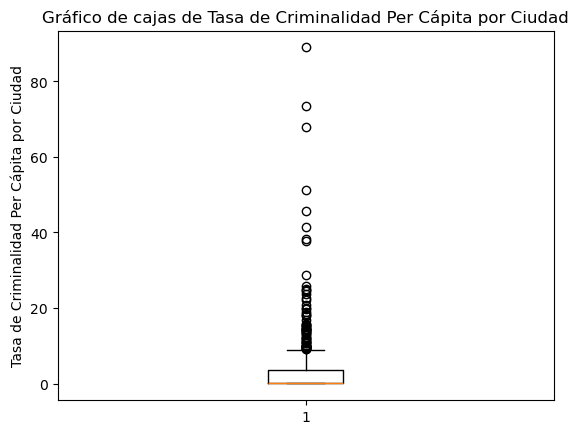

In [67]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Crear un gráfico de cajas
plt.boxplot(datos_boston['TASA_CRIMENES_PER_CAPITA'])

# Agregar títulos y etiquetas
plt.title('Gráfico de cajas de Tasa de Criminalidad Per Cápita por Ciudad')
plt.ylabel('Tasa de Criminalidad Per Cápita por Ciudad')

# Mostrar el gráfico
plt.show()

#### Otro ejemplo

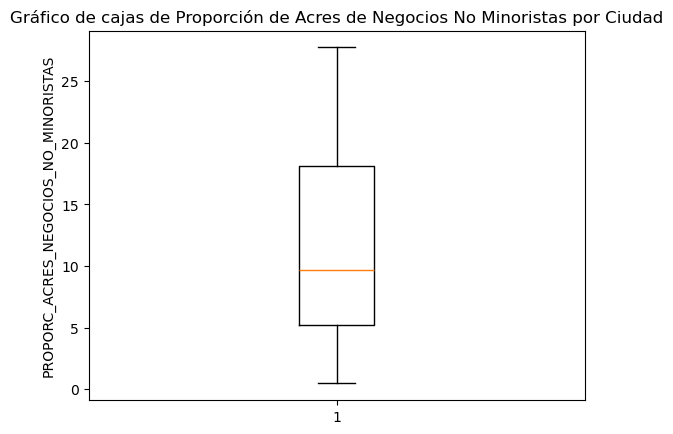

In [19]:
#Importar matplotlib
import matplotlib.pyplot as plt

# Crear un gráfico de cajas de 'INDUSTRALIZACION'
plt.boxplot(datos_boston['PROPORC_ACRES_NEGOCIOS_NO_MINORISTAS'])

# Agregar títulos y etiquetas
plt.title('Gráfico de cajas de Proporción de Acres de Negocios No Minoristas por Ciudad')
plt.ylabel('PROPORC_ACRES_NEGOCIOS_NO_MINORISTAS')

# Mostrar el gráfico
plt.show()

#### Otro ejemplo

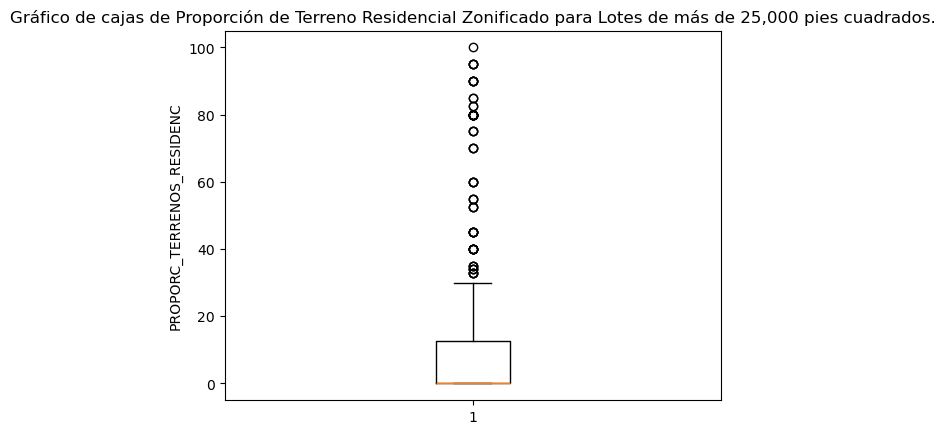

In [20]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Crear un gráfico de cajas de 'PORCION_DE_TERRENO'
plt.boxplot(datos_boston['PROPORC_TERRENOS_RESIDENC'])

# Agregar títulos y etiquetas
plt.title('Gráfico de cajas de Proporción de Terreno Residencial Zonificado para Lotes de más de 25,000 pies cuadrados.')
plt.ylabel('PROPORC_TERRENOS_RESIDENC')

# Mostrar el gráfico
plt.show()

### Barras: Un gráfico de barras es útil para comparar una variable entre distintos grupos o categorías. Por ejemplo, si quisiéramos observar el valor medio de cada ciudad.

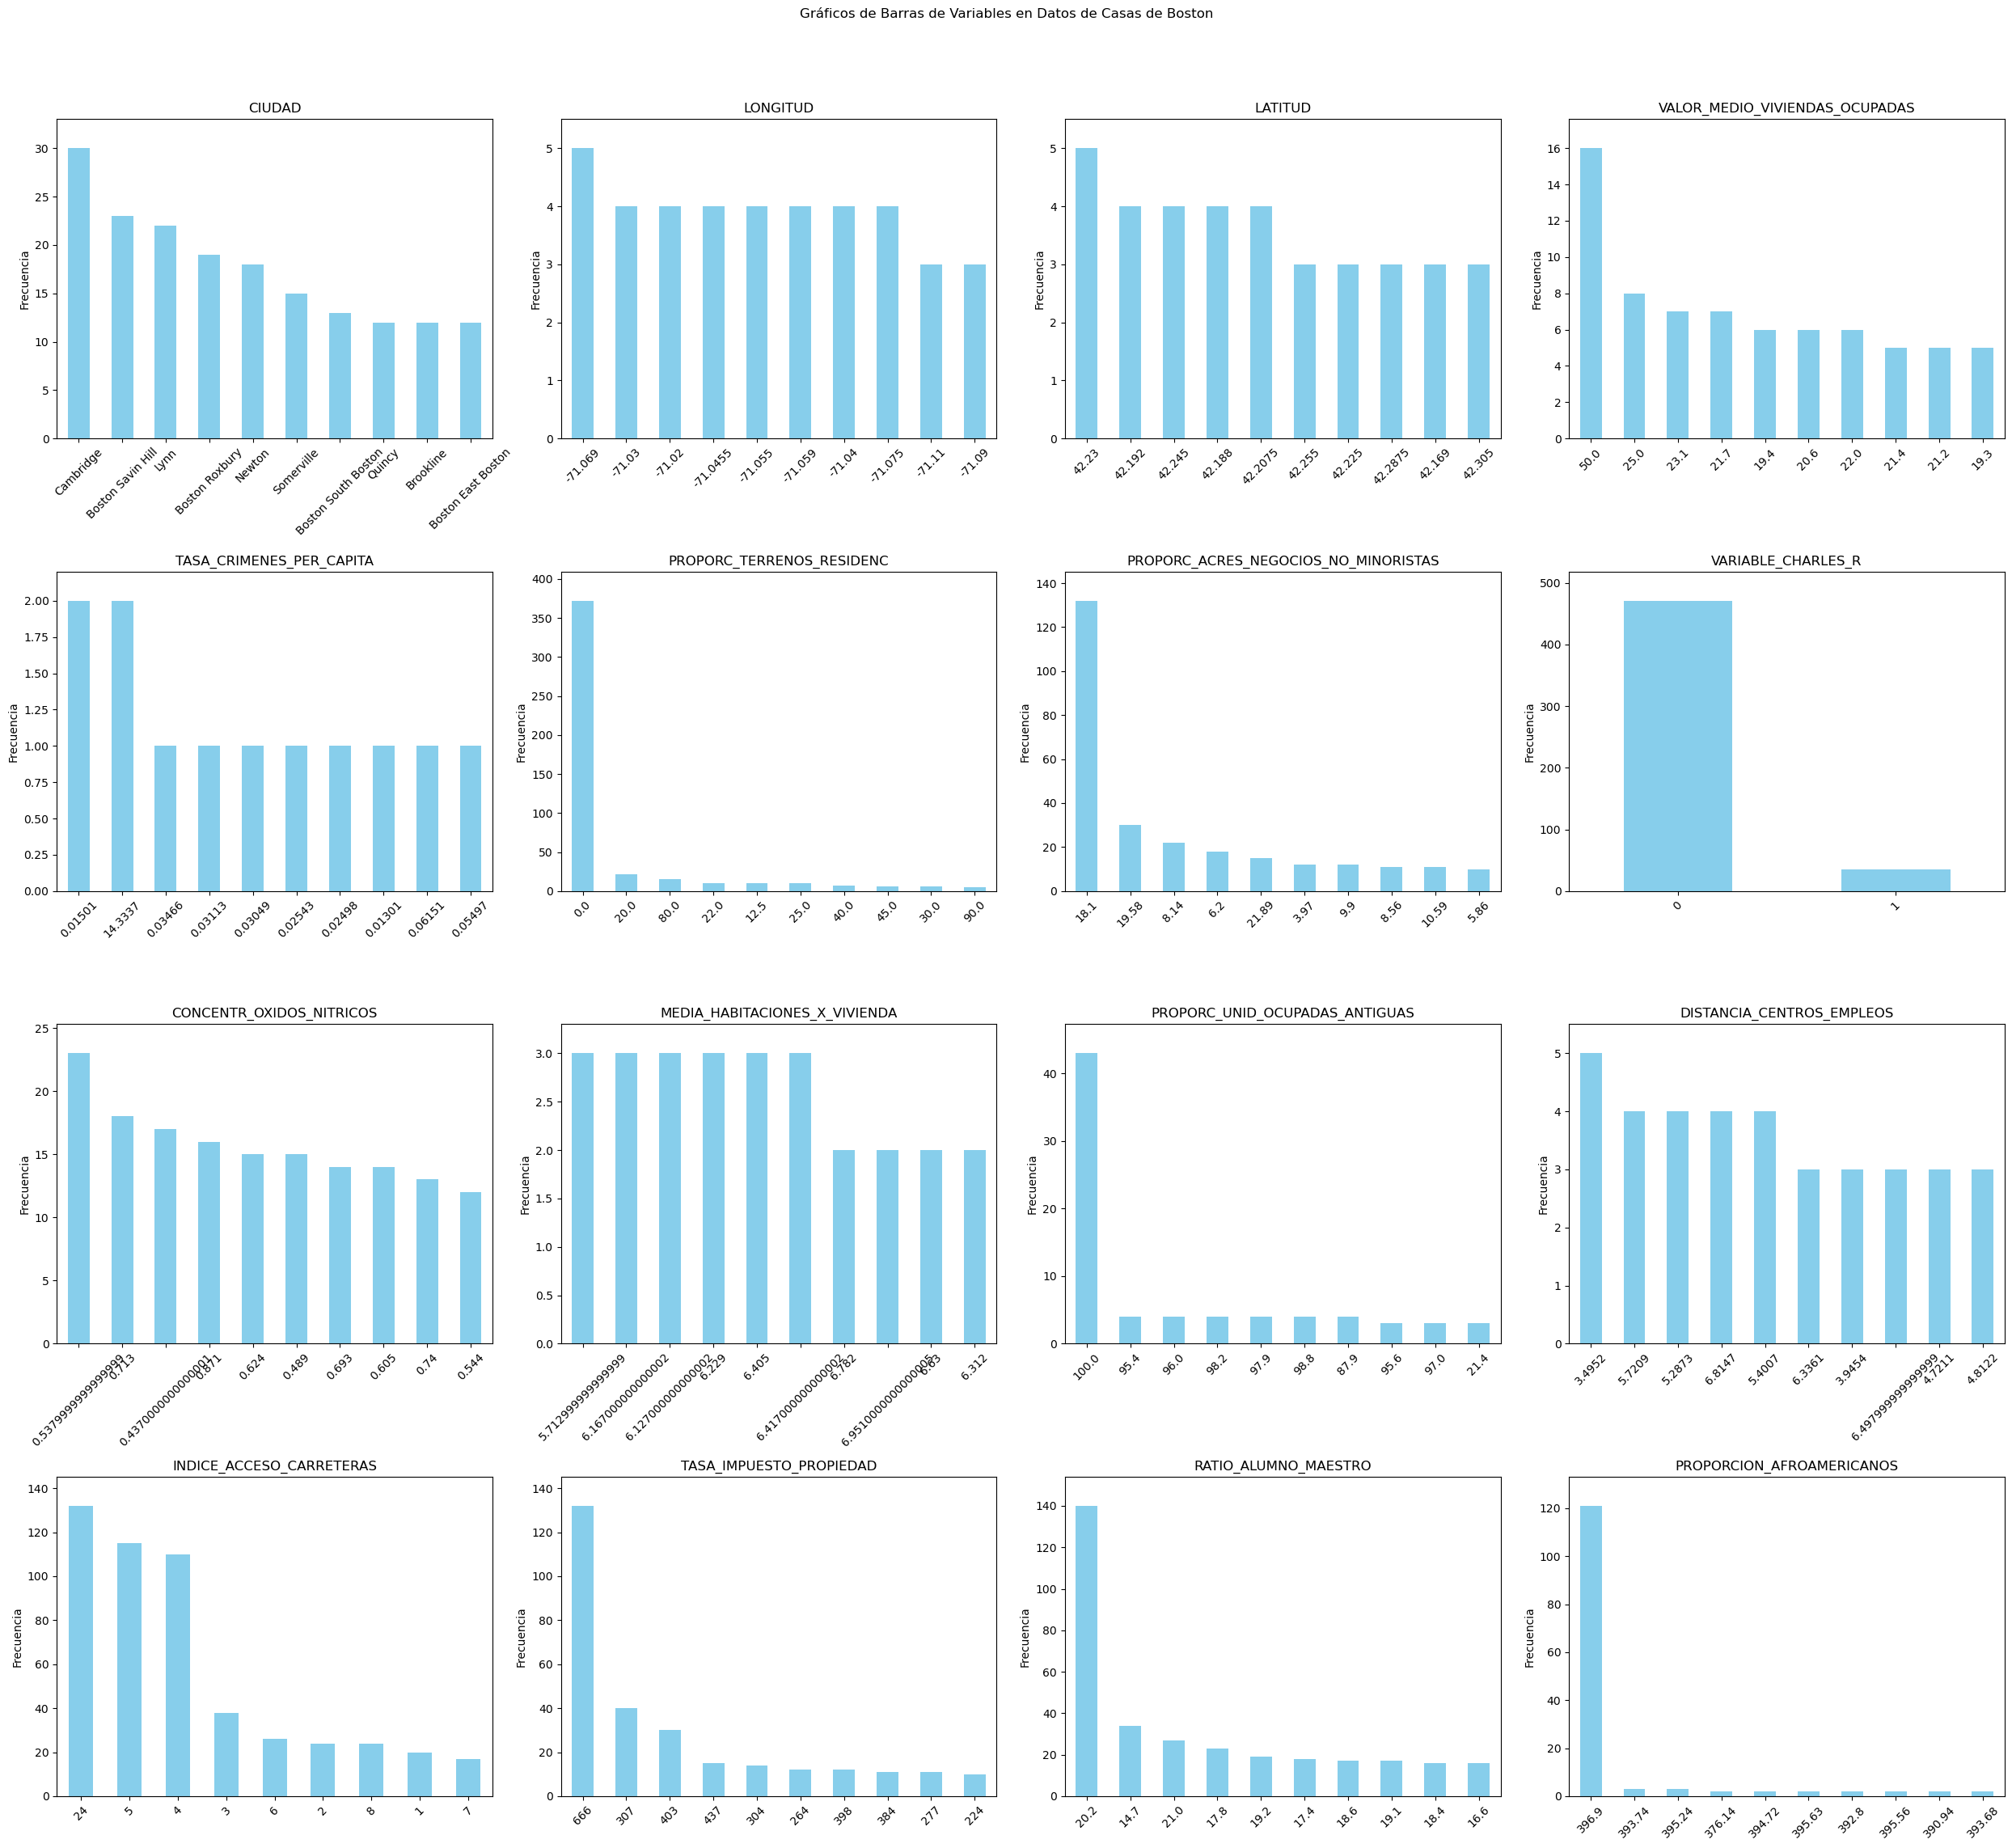

In [34]:
# Gráficos de Barras para las primeras 16 variables
num_variables_a_mostrar = min(len(variables), 16)
num_filas = (num_variables_a_mostrar + 3) // 4
fig, axs = plt.subplots(num_filas, 4, figsize=(25, 6*num_filas))
fig.suptitle('Gráficos de Barras de Variables en Datos de Casas de Boston')

# Recorremos las primeras 16 variables y creamos los gráficos de barras
for i, variable in enumerate(variables[:num_variables_a_mostrar]):
    fila = i // 4
    columna = i % 4
    ax = axs[fila, columna]
    
    # Verificar si la variable está presente en los datos y si hay datos para esa variable
    if variable in datos_boston.columns and not datos_boston[variable].isnull().all():
        # Obtener las 10 categorías más comunes
        top_10_categorias = datos_boston[variable].value_counts().head(10)
        top_10_categorias.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(variable)
        ax.set_ylabel('Frecuencia')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim(0, top_10_categorias.max() * 1.1)  # Ajustar el límite superior del eje y
    else:
        fig.delaxes(ax)  # Eliminar subgráfico si no hay datos para la variable

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Para nuestro caso se desea agrupar por ciudad y toma la media del valor mediano. Gráfica las 10 primeras ciudades.

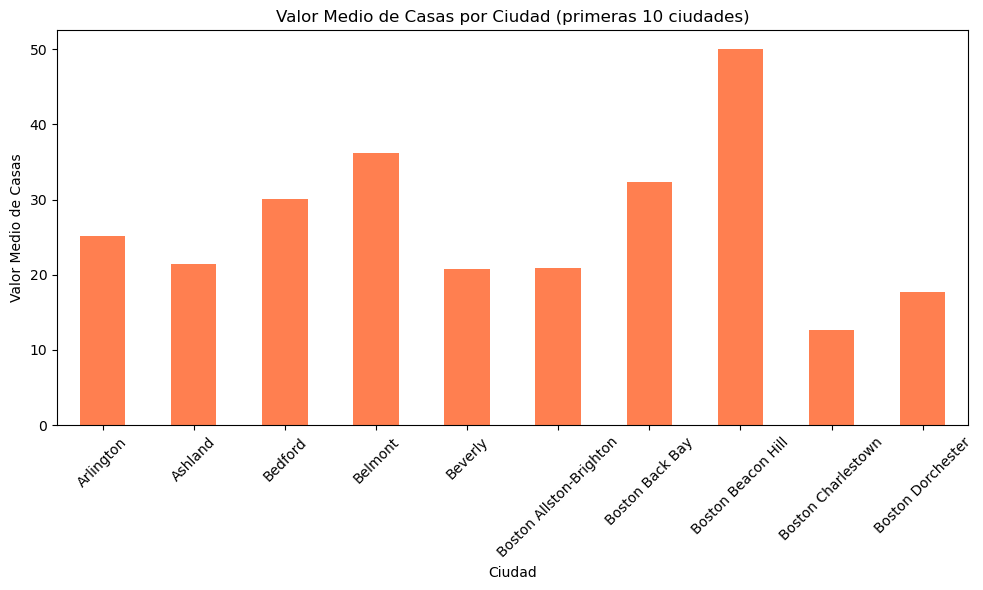

In [52]:
# Agrupar por ciudad y calcular la media del valor mediano
datos_agrupados_por_ciudad = datos_boston.groupby('CIUDAD')['VALOR_MEDIO_VIVIENDAS_OCUPADAS'].mean()

# Seleccionar las 10 primeras ciudades
primeras_10_ciudades = datos_agrupados_por_ciudad.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
primeras_10_ciudades.plot(kind='bar', color='coral')
plt.title('Valor Medio de Casas por Ciudad (primeras 10 ciudades)')
plt.xlabel('Ciudad')
plt.ylabel('Valor Medio de Casas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Otro ejemplo

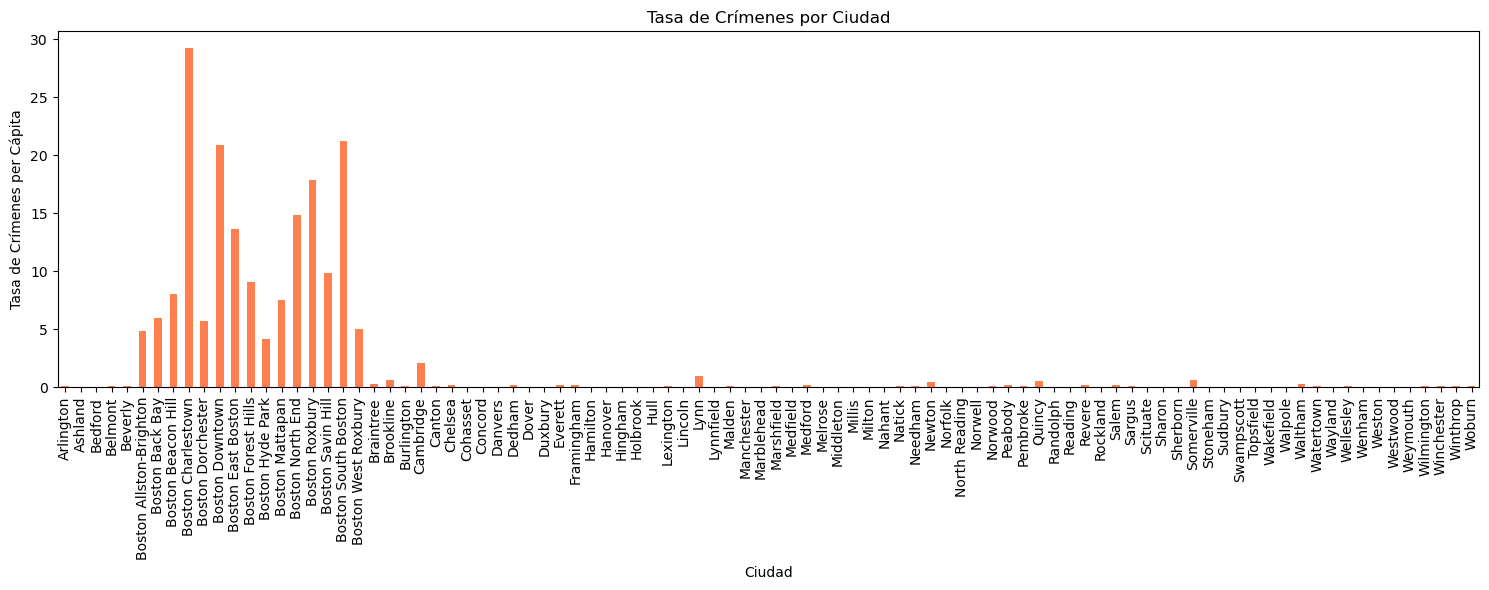

In [54]:
# Agrupar por ciudad y calcular la media de la tasa de crímenes per cápita
datos_agrupados_por_ciudad = datos_boston.groupby('CIUDAD')['TASA_CRIMENES_PER_CAPITA'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
datos_agrupados_por_ciudad.plot(kind='bar', color='coral')
plt.title('Tasa de Crímenes por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Tasa de Crímenes per Cápita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()